In [70]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
import os

In [74]:
figpath =  os.path.join(os.getcwd(),"figures")

In [3]:
filename = librosa.example("nutcracker")

In [4]:
y,sr  =  librosa.load(filename)

In [5]:
ipd.Audio(filename)

In [9]:
y.size

2643264

In [10]:
# Duration of one sample


sd =  1/sr

In [12]:
print(f"Duration of 1 sample {sd:6f} seconds")

Duration of 1 sample 0.000045 seconds


In [13]:
# Duration of the audio in seconds


duration =  sd * len(y)

print(f"the duration of the signal is {duration:6f} seconds")

the duration of the signal is 119.875918 seconds


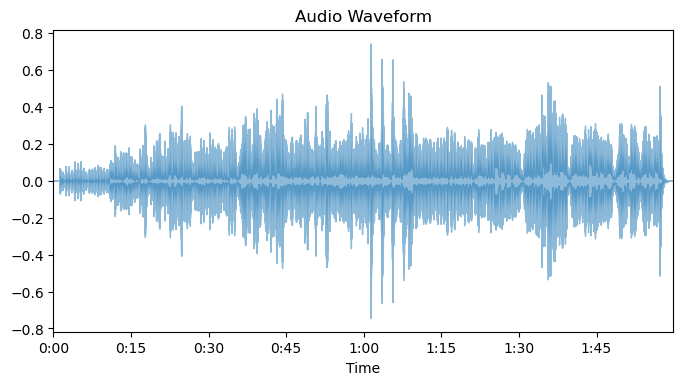

In [77]:
# Visualize the waveform of the dataset

plt.figure(1,figsize=(8,4),dpi=100)
librosa.display.waveplot(y,alpha=0.5)
# plt.xticks(np.arange(min(y), max(y)+1, 1.0))
plt.title("Audio Waveform")
plt.savefig(f'{figpath}/wave.pdf', dpi=300)
plt.show()

In [60]:
# Calculate the amplitude envelope for non-overlapping frames

def amplitude_envelope(signal,fs):
    ''' 
      fs : frame_size 
      signal is the waveform
    '''
    amplitude_envelope =  []
    #We want to calculate AE for each frame
    for i in range(0,len(signal),fs):
        currentframe_amplitude_envelope  =  max(signal[i:i+fs])
        amplitude_envelope.append(currentframe_amplitude_envelope)
    return np.array(amplitude_envelope)


# Calculate the amplitude envelope for non-overlapping frames

def amplitude_envelope_overlap(signal,frame_size,hop_length):
    '''  
      signal is the waveform
    '''
    amplitude_envelope =  []
    #We want to calculate AE for each frame
    for i in range(0,len(signal),hop_length):
        currentframe_amplitude_envelope  =  max(signal[i:i+frame_size])
        amplitude_envelope.append(currentframe_amplitude_envelope)
    return np.array(amplitude_envelope)


def fancy_amplitude_envelope_overlap(signal,frame_size,hop_length):
    return np.array([max(signal[i:i+frame_size] )  for i in range(0,signal.size,hop_length) ])

In [42]:
FRAME_SIZE =  1024
HOP_LENGTH =  512
ae_y =  amplitude_envelope(y,FRAME_SIZE)

print(ae_y)

[5.2649058e-05 5.7004589e-05 4.8424910e-05 ... 8.0174534e-05 8.8251858e-05
 8.3783030e-05]


In [39]:
ae_y.size

2582

In [44]:
ae_yh  = amplitude_envelope_overlap(y,FRAME_SIZE,HOP_LENGTH)

In [61]:
ae_fyh = fancy_amplitude_envelope_overlap(y,FRAME_SIZE,HOP_LENGTH)

ae_fyh.size

5163

In [62]:
(ae_yh == ae_fyh).all()

True

In [45]:
ae_yh.size

5163

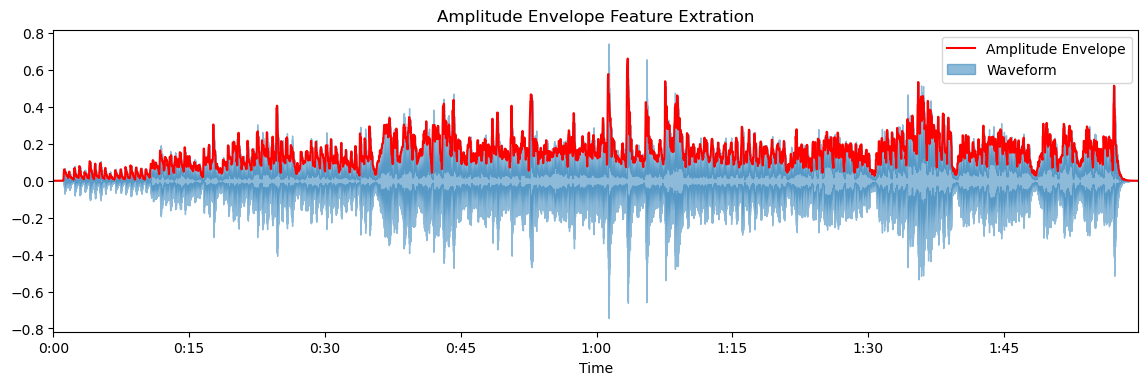

In [81]:
frames =  range(0,ae_fyh.size)
t  = librosa.frames_to_time(frames,hop_length=HOP_LENGTH)
plt.figure(1,figsize=(14,4),dpi=100)
librosa.display.waveplot(y,alpha=0.5)
plt.plot(t,ae_fyh,color="r")
plt.title("Amplitude Envelope Feature Extration")
plt.savefig(f'{figpath}/AE.pdf', dpi=300)
plt.legend(["Amplitude Envelope","Waveform"])
plt.show()



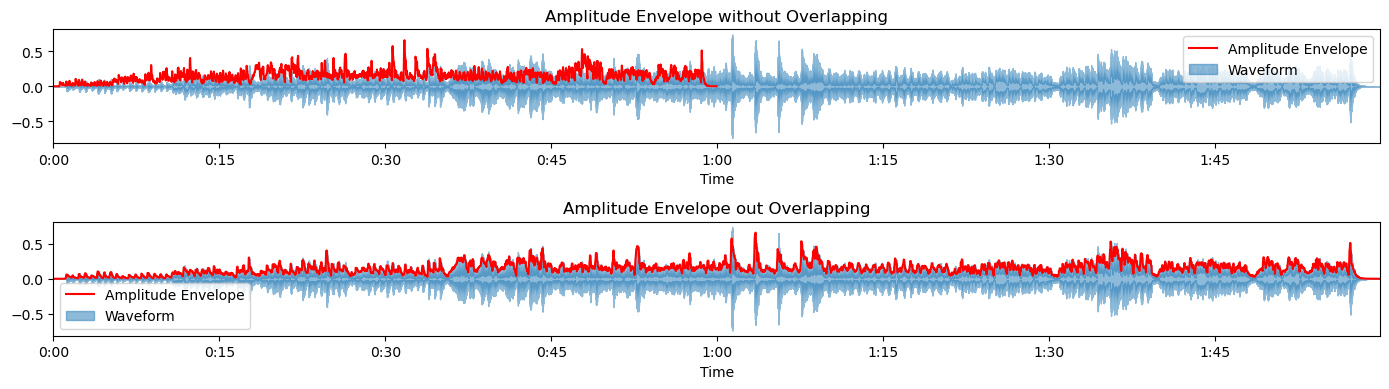

In [82]:
frames =  range(0,ae_y.size)

t1 = librosa.frames_to_time(frames,hop_length=HOP_LENGTH)

frames =  range(0,ae_yh.size)
t2  = librosa.frames_to_time(frames,hop_length=HOP_LENGTH)
plt.figure(1,figsize=(14,4),dpi=100)
plt.subplot(2,1,1)
librosa.display.waveplot(y,alpha=0.5)
plt.plot(t1,ae_y,color="r")
plt.title("Amplitude Envelope without Overlapping")
plt.legend(["Amplitude Envelope","Waveform"])
plt.subplot(2,1,2)
librosa.display.waveplot(y,alpha=0.5)
plt.plot(t2,ae_yh,color="r")
plt.title("Amplitude Envelope out Overlapping")
plt.legend(["Amplitude Envelope","Waveform"])
plt.tight_layout()
plt.savefig(f'{figpath}/AE_Compare.pdf', dpi=300)
plt.show()